In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo CSV comprimido
csv_gz_path = '../data/raw/1_tabla_hechos.csv.gz'

# Leer el archivo CSV comprimido con pandas
df = pd.read_csv(csv_gz_path, compression='gzip')


In [2]:
df

,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
0,AR,2020-01-01,AR,3.000000,0.000000,3.000000,0.000000,342635.408783
1,AR,2020-01-02,AR,14.000000,0.000000,17.000000,0.000000,342635.408783
2,AR,2020-01-03,AR,3.000000,0.000000,20.000000,0.000000,342635.408783
3,AR,2020-01-04,AR,7.000000,0.000000,27.000000,0.000000,342635.408783
4,AR,2020-01-05,AR,5.000000,0.000000,32.000000,0.000000,342635.408783
...,...,...,...,...,...,...,...,...
3569577,PE_UCA_0401,2022-09-13,PE,55.340823,1.467832,19295.145805,643.343631,342635.408783
3569578,PE_UCA_0401,2022-09-14,PE,55.340823,1.467832,19295.145805,643.343631,342635.408783
3569579,PE_UCA_0401,2022-09-15,PE,55.340823,1.467832,19295.145805,643.343631,342635.408783
3569580,PE_UCA_0401,2022-09-16,PE,55.340823,1.467832,19295.145805,643.343631,342635.408783


In [3]:
dfar = df[df['country_code'] == 'AR']

In [4]:
dfar

,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
0,AR,2020-01-01,AR,3.000000,0.000000,3.000000,0.000000,342635.408783
1,AR,2020-01-02,AR,14.000000,0.000000,17.000000,0.000000,342635.408783
2,AR,2020-01-03,AR,3.000000,0.000000,20.000000,0.000000,342635.408783
3,AR,2020-01-04,AR,7.000000,0.000000,27.000000,0.000000,342635.408783
4,AR,2020-01-05,AR,5.000000,0.000000,32.000000,0.000000,342635.408783
...,...,...,...,...,...,...,...,...
540090,AR_Z_049,2022-09-13,AR,55.340823,1.467832,19295.145805,643.343631,342635.408783
540091,AR_Z_049,2022-09-14,AR,55.340823,1.467832,19295.145805,643.343631,342635.408783
540092,AR_Z_049,2022-09-15,AR,55.340823,1.467832,19295.145805,643.343631,342635.408783
540093,AR_Z_049,2022-09-16,AR,55.340823,1.467832,19295.145805,643.343631,342635.408783


In [5]:
# Información general del DataFrame
dfar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540095 entries, 0 to 540094
Data columns (total 8 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   location_key                           540095 non-null  object 
 1   date                                   540095 non-null  object 
 2   country_code                           540095 non-null  object 
 3   new_confirmed                          540095 non-null  float64
 4   new_deceased                           540095 non-null  float64
 5   cumulative_confirmed                   540095 non-null  float64
 6   cumulative_deceased                    540095 non-null  float64
 7   cumulative_vaccine_doses_administered  540095 non-null  float64
dtypes: float64(5), object(3)
memory usage: 37.1+ MB


In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# Descripción estadística de las variables numéricas
dfar.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
count,540095.00,540095.00,540095.00,540095.00,540095.00
mean,68.60,1.17,24016.63,539.60,266666.93
std,1012.30,9.75,240181.33,4082.82,1731845.54
min,0.00,0.00,0.00,0.00,1.00
25%,1.00,0.00,764.00,15.00,16286.00
50%,15.00,0.00,6778.00,129.00,342635.41
75%,55.34,1.47,19295.15,643.34,342635.41
max,174174.00,656.00,9697763.00,129830.00,109204825.00


In [8]:
dfar.describe(include='object')

,location_key,date,country_code
count,540095,540095,540095
unique,545,991,1
top,AR,2020-01-01,AR
freq,991,545,540095


In [9]:
unique_counts = dfar.nunique()

# Mostrar el número de valores únicos por columna
print("Número de valores únicos por columna:")
print(unique_counts)

Número de valores únicos por columna:
location_key                               545
date                                       991
country_code                                 1
new_confirmed                             3217
new_deceased                               397
cumulative_confirmed                     54971
cumulative_deceased                       6277
cumulative_vaccine_doses_administered    85180
dtype: int64


In [10]:
# Ver la cantidad de valores nulos por columna
nulos_por_columna = dfar.isnull().sum()

print("Valores nulos por columna:")
nulos_por_columna


Valores nulos por columna:


location_key                             0
date                                     0
country_code                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
dtype: int64

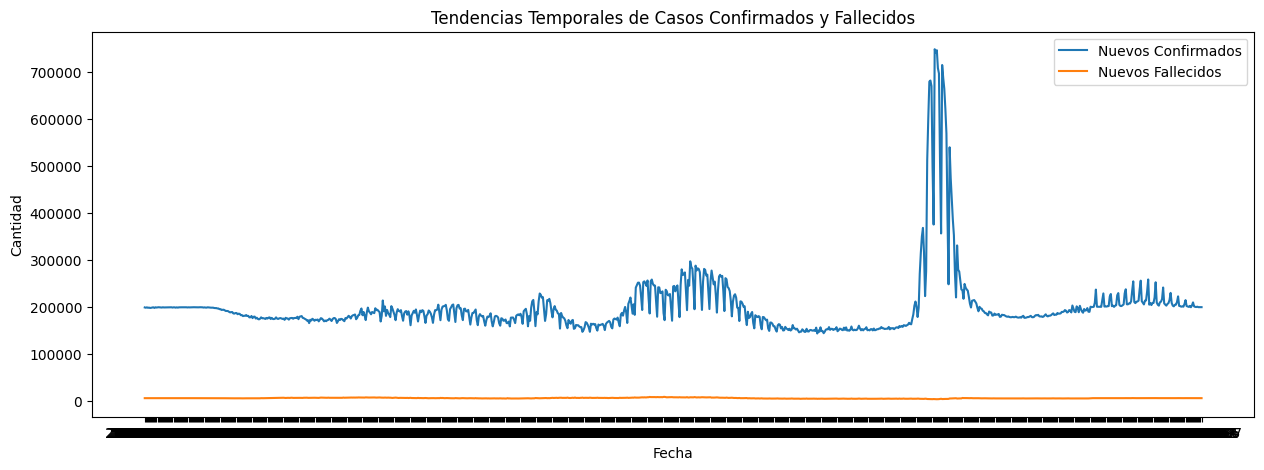

In [11]:
# Convertir la columna 'date' a formato datetime
#df['date'] = pd.to_datetime(df['date'])
dfar.loc[:, 'date'] = pd.to_datetime(dfar['date'])

# Agrupar por fecha y obtener sumas diarias de casos confirmados y fallecimientos
daily_data = df.groupby('date')[['new_confirmed', 'new_deceased']].sum().reset_index()

# Visualizar las tendencias temporales
plt.figure(figsize=(15, 5))
plt.plot(daily_data['date'], daily_data['new_confirmed'], label='Nuevos Confirmados')
plt.plot(daily_data['date'], daily_data['new_deceased'], label='Nuevos Fallecidos')
plt.title('Tendencias Temporales de Casos Confirmados y Fallecidos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

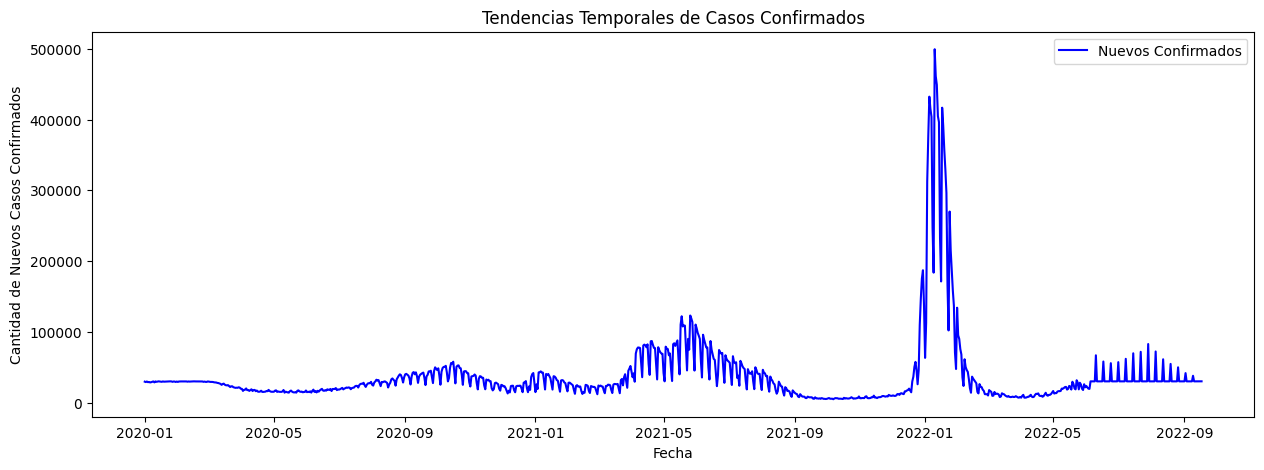

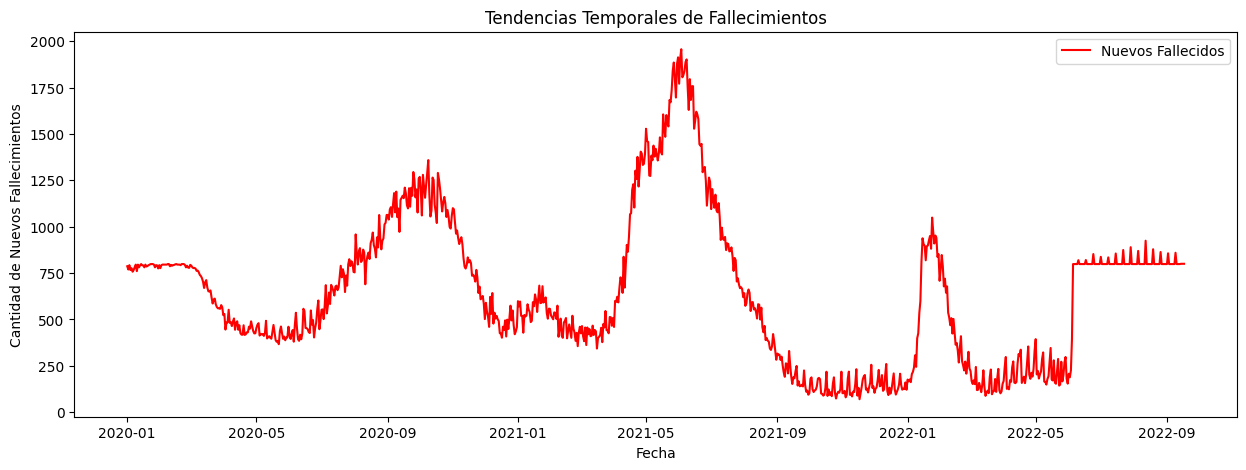

In [12]:
# Convertir la columna 'date' a formato datetime
#dfar['date'] = pd.to_datetime(dfar['date'])
dfar.loc[:, 'date'] = pd.to_datetime(dfar['date'])

# Agrupar por fecha y obtener sumas diarias de casos confirmados y fallecimientos
daily_data = dfar.groupby('date')[['new_confirmed', 'new_deceased']].sum().reset_index()

# Visualizar las tendencias temporales de casos confirmados
plt.figure(figsize=(15, 5))
plt.plot(daily_data['date'], daily_data['new_confirmed'], label='Nuevos Confirmados', color='blue')
plt.title('Tendencias Temporales de Casos Confirmados')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Nuevos Casos Confirmados')
plt.legend()
plt.show()

# Visualizar las tendencias temporales de fallecimientos
plt.figure(figsize=(15, 5))
plt.plot(daily_data['date'], daily_data['new_deceased'], label='Nuevos Fallecidos', color='red')
plt.title('Tendencias Temporales de Fallecimientos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Nuevos Fallecimientos')
plt.legend()
plt.show()

In [13]:
dfar.to_csv('../data/processed/1_tabla_hechos_AR.csv.gz', index=False, compression='gzip')

In [14]:
dfar.sort_values(by='date').head(20)

,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
0,AR,2020-01-01 00:00:00,AR,3.00,0.00,3.00,0.00,342635.41
119911,AR_B_651,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
420184,AR_S_112,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
222975,AR_G_035,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
317120,AR_L_070,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
265588,AR_H_133,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
274507,AR_J_021,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
492527,AR_X_056,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
47568,AR_B_182,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
352796,AR_N_042,2020-01-01 00:00:00,AR,55.34,1.47,19295.15,643.34,342635.41
